# Human activity detector by smartphone sensor readings

In [1]:
#importing dependancies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense

from sklearn.metrics import f1_score

from sklearn.metrics import classification_report
from yellowbrick.classifier import ClassificationReport

## Training and Testing data

In [2]:
#Training data
X_train = pd.read_csv("Dataset/Train/X_train.txt", sep = " ", header = None)
y_train = pd.read_csv("Dataset/Train/y_train.txt", sep = " ", header = None)

#Testing data
X_test = pd.read_csv("Dataset/Test/X_test.txt", sep = " ", header = None)
y_test = pd.read_csv("Dataset/Test/y_test.txt", sep = " ", header = None)

#activity labels
y_labels = pd.read_csv("Dataset/activity_labels.txt", header = None)
classes = y_labels[0]

#feature labels
features = pd.read_csv("Dataset/features.txt", header = None)

# Initiate blank dictionary to store model name and f1 score
scores = {}

In [3]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.012236,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,0.440079,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,0.430891,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,0.137735,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080


In [4]:
X_train.shape

(7767, 561)

In [5]:
X_test.shape

(3162, 561)

## Random Forest Classifier

In [6]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 50)

In [7]:
#fitting the training data into random forest classifier
rf_classifier.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [8]:
print("Training Data Score: {}".format(rf_classifier.score(X_train, y_train)))
print("Testing Data Score: {}".format(rf_classifier.score(X_test, y_test)))

Training Data Score: 1.0
Testing Data Score: 0.9127134724857685


In [9]:
predictions = rf_classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10]}")

First 10 Predictions:   [5 5 5 5 5 5 5 5 5 5]
First 10 Actual labels:    0
0  5
1  5
2  5
3  5
4  5
5  5
6  5
7  5
8  5
9  5


              precision    recall  f1-score   support

           1       0.88      0.96      0.92       496
           2       0.89      0.90      0.90       471
           3       0.95      0.85      0.90       420
           4       0.89      0.88      0.89       508
           5       0.90      0.91      0.90       556
           6       1.00      1.00      1.00       545
           7       0.77      0.74      0.76        23
           8       0.90      0.90      0.90        10
           9       0.75      0.84      0.79        32
          10       0.67      0.56      0.61        25
          11       0.77      0.69      0.73        49
          12       0.60      0.56      0.58        27

    accuracy                           0.91      3162
   macro avg       0.83      0.82      0.82      3162
weighted avg       0.91      0.91      0.91      3162



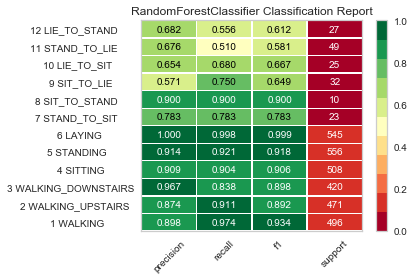

In [28]:
# Classification metrics
from sklearn.metrics import classification_report
y_pred_rf = rf_classifier.predict(X_test)
target_names = np.arange(1,13)

print(classification_report(y_test, y_pred_rf))

visualizer = ClassificationReport(rf_classifier, support=True, classes = classes, cmap='RdYlGn')
visualizer.fit(X_train, y_train.values.ravel())  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

f1 = f1_score(y_test, y_pred_rf, average='micro')
scores.update({"Random Forest": f1})

## Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB

              precision    recall  f1-score   support

           1       0.83      0.84      0.83       496
           2       0.78      0.94      0.85       471
           3       0.83      0.61      0.70       420
           4       0.55      0.90      0.68       508
           5       0.86      0.40      0.54       556
           6       1.00      0.86      0.92       545
           7       0.27      0.65      0.38        23
           8       0.53      0.90      0.67        10
           9       0.52      0.75      0.62        32
          10       0.41      0.84      0.55        25
          11       0.63      0.55      0.59        49
          12       0.53      0.30      0.38        27

    accuracy                           0.75      3162
   macro avg       0.64      0.71      0.64      3162
weighted avg       0.79      0.75      0.74      3162



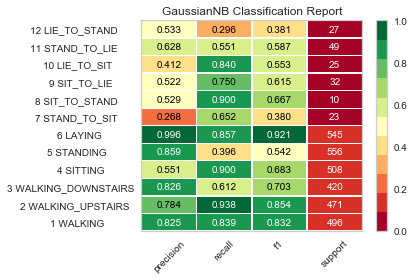

In [15]:
#Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train.values.ravel())
y_pred_gnb = gnb.predict(X_test)
print(classification_report(y_test, y_pred_gnb))

visualizer = ClassificationReport(gnb, support=True, classes = classes, cmap='RdYlGn')
visualizer.fit(X_train, y_train.values.ravel())  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

f1 = f1_score(y_test, y_pred_gnb, average='micro')
scores.update({"GaussianNB": f1})

              precision    recall  f1-score   support

           1       0.77      0.57      0.65       496
           2       0.82      0.55      0.66       471
           3       0.51      0.89      0.65       420
           4       0.81      0.72      0.77       508
           5       0.79      0.81      0.80       556
           6       1.00      0.96      0.98       545
           7       0.41      0.61      0.49        23
           8       0.82      0.90      0.86        10
           9       0.44      0.56      0.49        32
          10       0.32      0.48      0.39        25
          11       0.60      0.57      0.58        49
          12       0.56      0.67      0.61        27

    accuracy                           0.75      3162
   macro avg       0.65      0.69      0.66      3162
weighted avg       0.78      0.75      0.75      3162



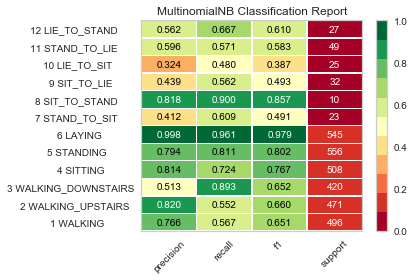

In [16]:
#Multinomial Naive Bayes
#Transform data from [-1, 1] to [0, 1]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

mnb = MultinomialNB()
mnb.fit(X_train_scaled, y_train.values.ravel())
y_pred_mnb = mnb.predict(X_test_scaled)
print(classification_report(y_test, y_pred_mnb))

visualizer = ClassificationReport(mnb, support=True, classes = classes, cmap='RdYlGn')
visualizer.fit(X_train_scaled, y_train.values.ravel())  # Fit the visualizer and the model
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.poof() 

f1 = f1_score(y_test, y_pred_mnb, average='micro')
scores.update({"MultinomialNB": f1})

C:\Users\Nelson\.conda\envs\MachineLearning\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Nelson\.conda\envs\MachineLearning\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.38      0.01      0.01       496
           2       0.02      0.00      0.00       471
           3       0.28      1.00      0.44       420
           4       1.00      0.00      0.01       508
           5       0.65      0.98      0.78       556
           6       0.71      1.00      0.83       545
           7       0.00      0.00      0.00        23
           8       0.00      0.00      0.00        10
           9       0.00      0.00      0.00        32
          10       0.00      0.00      0.00        25
          11       0.00      0.00      0.00        49
          12       0.00      0.00      0.00        27

    accuracy                           0.48      3162
   macro avg       0.25      0.25      0.17      3162
weighted avg       0.50      0.48      0.34      3162



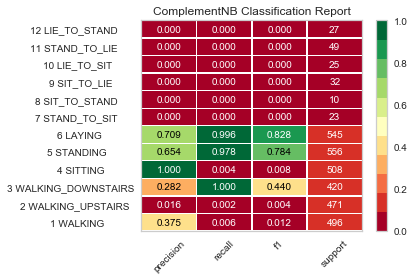

In [17]:
#Complement Naive Bayes
#Transform data from [-1, 1] to [0, 1]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

cnb = ComplementNB()
cnb.fit(X_train_scaled, y_train.values.ravel())
y_pred_cnb = cnb.predict(X_test_scaled)
print(classification_report(y_test, y_pred_cnb))

visualizer = ClassificationReport(cnb, support=True, classes = classes, cmap='RdYlGn')
visualizer.fit(X_train_scaled, y_train.values.ravel())  # Fit the visualizer and the model
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.poof() 

f1 = f1_score(y_test, y_pred_cnb, average='micro')
scores.update({"ComplementNB": f1})

              precision    recall  f1-score   support

           1       0.79      0.84      0.82       496
           2       0.77      0.93      0.84       471
           3       0.84      0.60      0.70       420
           4       0.87      0.74      0.80       508
           5       0.80      0.87      0.83       556
           6       1.00      0.98      0.99       545
           7       0.41      0.83      0.55        23
           8       0.62      0.80      0.70        10
           9       0.51      0.78      0.62        32
          10       0.58      0.72      0.64        25
          11       0.62      0.37      0.46        49
          12       0.67      0.59      0.63        27

    accuracy                           0.82      3162
   macro avg       0.71      0.75      0.71      3162
weighted avg       0.83      0.82      0.82      3162



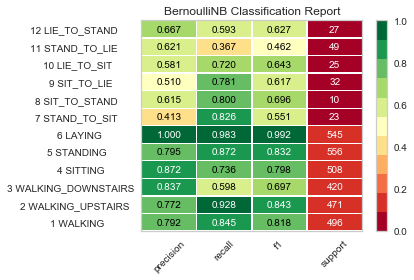

In [18]:
#Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(X_train, y_train.values.ravel())
y_pred_bnb = bnb.predict(X_test)
print(classification_report(y_test, y_pred_bnb))

visualizer = ClassificationReport(bnb, support=True, classes = classes, cmap='RdYlGn')
visualizer.fit(X_train, y_train.values.ravel())  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

f1 = f1_score(y_test, y_pred_bnb, average='micro')
scores.update({"BernoulliNB": f1})

## Deep Neural Network

### Pre-processing

In [19]:
# Convert the dataframe to a numpy array for Keras
X_train_arr = X_train.values
X_test_arr = X_test.values

# One-hot encoding the labels
y_train_arr =  to_categorical(y_train)
y_test_arr = to_categorical(y_test)

In [20]:
# An empty sequential model
model = Sequential()

In [21]:
# add the first layer of training data
model.add(Dense(100, activation="relu", input_dim = X_train_arr.shape[1]))

Instructions for updating:
Colocations handled automatically by placer.


In [22]:
# Adding a dropout layer to prevent overfitting
from tensorflow.keras.layers import Dropout

model.add(Dropout(0.5))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [23]:
# Adding second hidden layer
model.add(Dense(100, activation = "relu"))

In [24]:
# Adding third hidden layer
# model.add(Dense(100, activation = "relu"))

In [25]:
# Add output layer
model.add(Dense(y_train_arr.shape[1], activation = "softmax"))

In [26]:
# Compile the model
# Using categorical_crossentropy for the loss function, adam optimizer and accuracy metric

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics = ["accuracy"])

In [27]:
# Train the model
model.fit(X_train_arr, y_train_arr, epochs = 100, shuffle = True, verbose =2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 2s - loss: 0.8972 - acc: 0.6540
Epoch 2/100
 - 1s - loss: 0.4352 - acc: 0.8298
Epoch 3/100
 - 1s - loss: 0.3293 - acc: 0.8732
Epoch 4/100
 - 1s - loss: 0.2796 - acc: 0.8877
Epoch 5/100
 - 1s - loss: 0.2550 - acc: 0.8987
Epoch 6/100
 - 1s - loss: 0.2337 - acc: 0.9077
Epoch 7/100
 - 1s - loss: 0.2160 - acc: 0.9168
Epoch 8/100
 - 1s - loss: 0.2135 - acc: 0.9162
Epoch 9/100
 - 1s - loss: 0.2044 - acc: 0.9136
Epoch 10/100
 - 1s - loss: 0.1931 - acc: 0.9234
Epoch 11/100
 - 1s - loss: 0.1774 - acc: 0.9256
Epoch 12/100
 - 1s - loss: 0.1694 - acc: 0.9318
Epoch 13/100
 - 1s - loss: 0.1775 - acc: 0.9309
Epoch 14/100
 - 1s - loss: 0.1706 - acc: 0.9310
Epoch 15/100
 - 1s - loss: 0.1631 - acc: 0.9336
Epoch 16/100
 - 1s - loss: 0.1771 - acc: 0.9269
Epoch 17/100
 - 1s - loss: 0.1745 - acc: 0.9279
Epoch 18/100
 - 2s - loss: 0.1725 - acc: 0.9315
Epoch 19/100
 - 1s - loss: 0.1436 - acc: 0.9403
Epoch 20/100
 - 1s - loss: 0.1467 - acc: 0.9383
E

In [29]:
# save the trained model
model.save("deep_learning_model.h5")

### Evaluate the model with test data

In [30]:
# Load the saved model
from tensorflow.keras.models import load_model
model = load_model("deep_learning_model.h5")

In [31]:
# Load the saved model
from tensorflow.keras.models import load_model
model = load_model("deep_learning_model.h5")

In [32]:
# Evaluate
model_loss, model_accuracy = model.evaluate(X_test_arr, y_test_arr, verbose =3)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 0.19356797329283473, Accuracy: 0.9418089985847473


In [33]:
# Run this cell to specify the row numbers you want to test/compare

# Predict the class of given data

def predictor(data):
    return model.predict_classes(data)

# Decoding the label integer into its actual class name
def decoder(num):
    return y_labels[0][int(num)].strip().split()[1]

def compare(row_num):
    test_data = np.expand_dims(X_test_arr[row_num], axis = 0)
    print (f" OBSERVED: {decoder(y_test.iloc[row_num,0])}\t\t   PREDICTED: {decoder(predictor(test_data))}")


begin = int(input("Which row you want to start from?(Range 1-3162) \n"))-1
end = int(input("Which row you want it to end?\n"))
for i in range(begin, end):
    compare(i)

Which row you want to start from?(Range 1-3162) 
1
Which row you want it to end?
2
 OBSERVED: LAYING		   PREDICTED: LAYING
 OBSERVED: LAYING		   PREDICTED: LAYING
